In [1]:
import pandas as pd 
dataset=pd.read_csv("indianEco.csv")
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset.set_index('Year', inplace=True)
dataset

,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,,,,,,,,,,,
1960-01-01,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1961-01-01,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
1962-01-01,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
1963-01-01,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
1964-01-01,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,India,2.294798e+12,1733,8.26,20.92,19.16,3.616943e+11,4.95,1338636340,1.19,68.67
2017-01-01,India,2.651473e+12,1981,6.80,21.95,18.79,4.126138e+11,3.33,1354195680,1.16,68.97
2018-01-01,India,2.702930e+12,1997,6.53,23.69,19.93,3.991672e+11,3.94,1369003306,1.09,69.27


In [2]:
column = "Inflation, consumer prices (annual %)"
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1 = Ms.fit_transform(dataset[[column]])
print("Len:" , data1.shape)

Len: (61, 1)


In [3]:
training_size = round(len(data1) * 0.80)
print(training_size)

X_train = data1[:training_size]
X_test = data1[training_size:]
print("X_train length:", X_train.shape)
print("X_test length:", X_test.shape)

y_train = data1[:training_size]
y_test = data1[training_size:]
print("y_train length:", y_train.shape)
print("y_test length:", y_test.shape)

49
X_train length: (49, 1)
X_test length: (12, 1)
y_train length: (49, 1)
y_test length: (12, 1)


In [4]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trend=n
RMSE-Testset: 0.22712599735146674
maPe-Testset: 0.5320572399960298
************


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trend=t
RMSE-Testset: 0.2888165639825659
maPe-Testset: 0.6938646341522327
************


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Trend=c
RMSE-Testset: 0.13552129080205216
maPe-Testset: 0.28014143796249596
************
Trend=ct
RMSE-Testset: 0.07539662548199809
maPe-Testset: 0.17690690777855347
************


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [5]:
#i=1
td="ct"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Trend=ct
RMSE-Testset: 0.10344230509106414
maPe-Testset: 0.22876529459349382
************


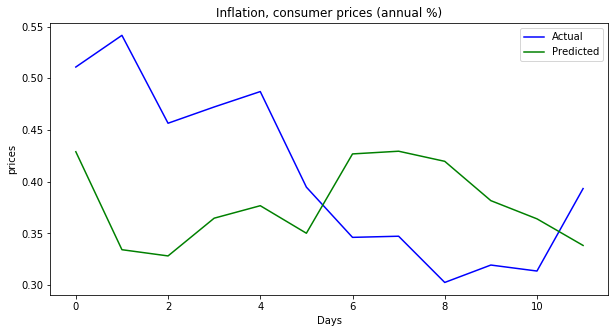

In [6]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [7]:
y_test

array([[0.51090257],
       [0.54154016],
       [0.45652774],
       [0.47226056],
       [0.48716533],
       [0.39470052],
       [0.346122  ],
       [0.34722606],
       [0.30251173],
       [0.31934861],
       [0.3135523 ],
       [0.39332045]])

In [8]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [9]:
aTestNormTable

,"Inflation, consumer prices (annual %)"
0,0.510903
1,0.54154
2,0.456528
3,0.472261
4,0.487165
5,0.394701
6,0.346122
7,0.347226
8,0.302512
9,0.319349


In [10]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [11]:
actual_stock_price_test_ori

array([[10.88],
       [11.99],
       [ 8.91],
       [ 9.48],
       [10.02],
       [ 6.67],
       [ 4.91],
       [ 4.95],
       [ 3.33],
       [ 3.94],
       [ 3.73],
       [ 6.62]])

In [12]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [13]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

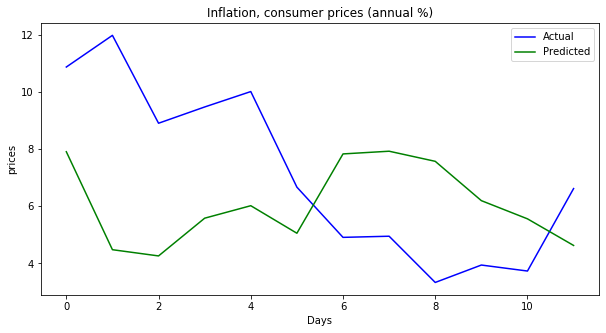

In [14]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Inflation, consumer prices (annual %)","Days","prices")

In [15]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 3.747714713449254
maPe-Testset: 0.525875891409106


In [16]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [17]:
forecast

array([0.37100396, 0.37829691, 0.41059683, 0.41353855])

In [18]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Inflation, consumer prices (annual %)"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Inflation, consumer prices (annual %)"])

In [19]:
forecast_stock_price_test_oriF

,"Inflation, consumer prices (annual %)"
0,5.811473
1,6.075697
2,7.245923
3,7.352502
